# A Tutorial on Ridge and Lasso Regression in Python
---

- `Ridge` and `Lasso` Regression are types of Regularization techniques
- `Regularization techniques` are used to deal with overfitting and when the dataset is large
- Ridge and Lasso Regression `involve adding penalties to the regression function`

Though Ridge and Lasso might appear to work towards a common goal, the inherent properties and practical use cases differ substantially.

**Ridge Regression:**
- Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
- Minimization objective = LS Obj + α * (sum of square of coefficients)

**Lasso Regression:**
- Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
- Minimization objective = LS Obj + α * (sum of absolute value of coefficients)


Note that here ‘LS Obj’ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.

#### Why Penalize the Magnitude of Coefficients?

Let’s try to understand the impact of model complexity on the magnitude of coefficients. Lets simulate a sine curve (between 60° and 300°) and add some random noise using the following code:



In [1]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

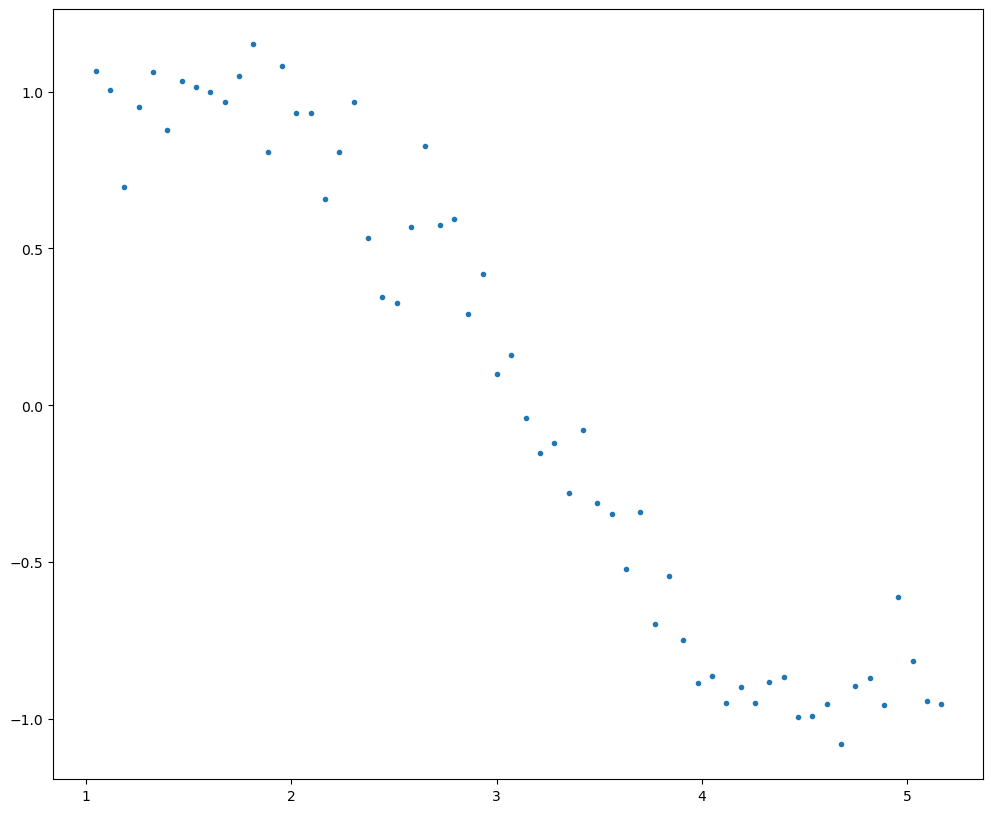

In [2]:
#Define input array with angles from 60deg to 300deg converted to radians

x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
plt.show()

Let’s try to estimate the sine function using polynomial regression with powers of x from 1 to 15. Let’s add a column for each power upto 15 in our dataframe. This can be accomplished using the following code:

In [3]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

Now that we have all the 15 powers, let’s make 15 different linear regression models, with each model containing variables with powers of x from 1 to the particular model number. For example, the feature set of model 8 will be – {x, x_2, x_3, …, x_8}.

First, we’ll `define a generic function that takes in the required maximum power of x as an input and returns a list containing` – `[ model RSS, intercept, coef_x, coef_x2, … upto entered power ]`. Here RSS refers to the ‘Residual Sum of Squares,’

`sum of squares of errors between the predicted and actual values in the training data set` and is known as the cost function or the loss function

In [8]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression()
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

Note that this function will not plot the model fit for all the powers but will return the RSS and coefficient values for all the models

Now, we can make all 15 models and compare the results. For ease of analysis, we’ll store all the results in a Pandas dataframe and plot 6 models to get an idea of the trend. Consider the following code:

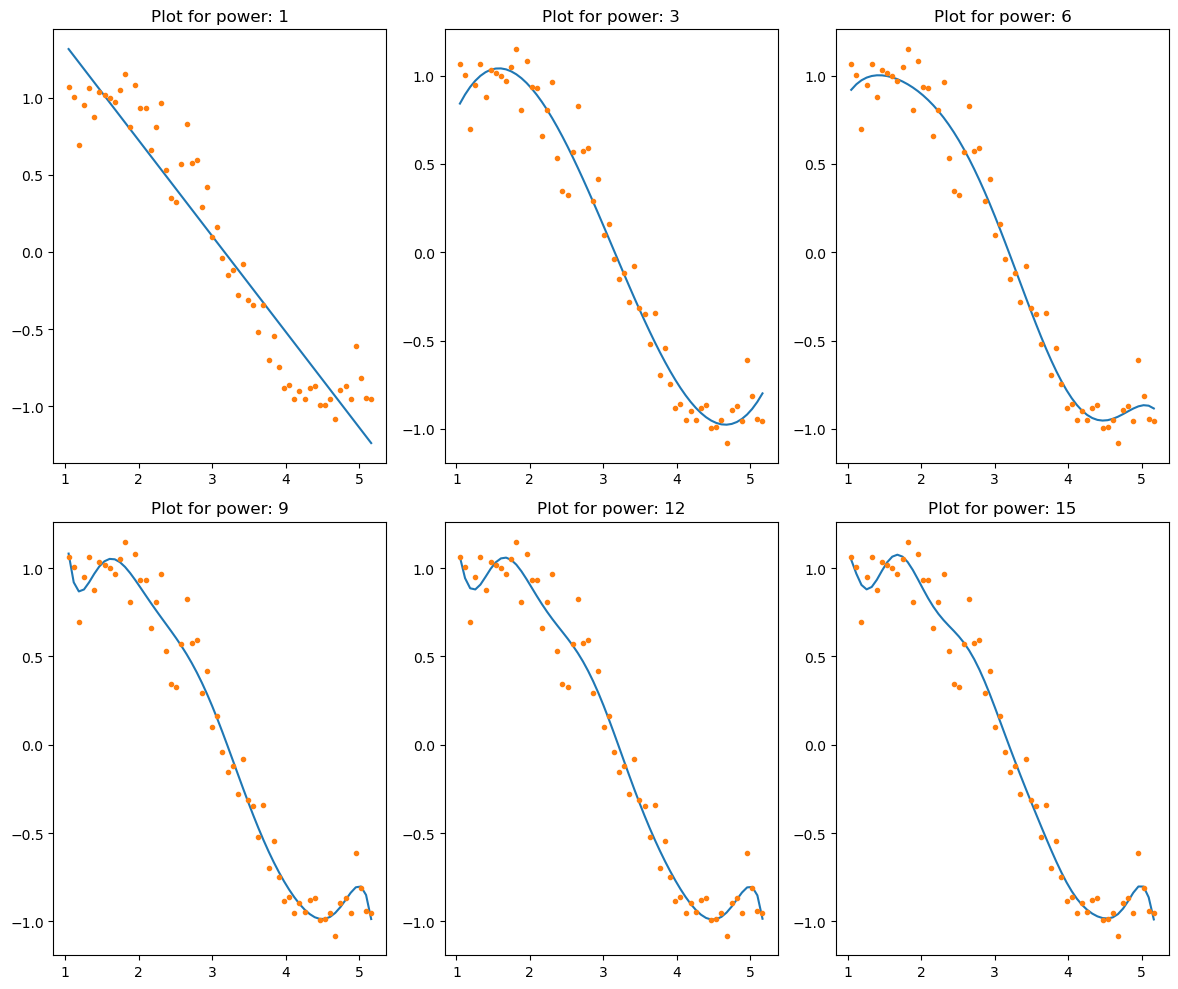

In [9]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

This clearly aligns with our initial understanding. `As the model complexity increases, the models tend to fit even smaller deviations in the training data set.` Though this leads to overfitting, let’s keep this issue aside for some time and come to our main objective, i.e., the impact on the magnitude of coefficients. This can be analyzed by looking at the data frame created above.

In [10]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


It is clearly evident that the `size of coefficients increases exponentially with an increase in model complexity.` I hope this gives some intuition into why putting a constraint on the magnitude of coefficients can be a good idea to reduce model complexity.

`What does a large coefficient signify?` It `means that we’re putting a lot of emphasis on that feature,` i.e., the particular feature is a good predictor for the outcome. `When it becomes too large, the algorithm starts modeling intricate relations to estimate the output and ends up overfitting the particular training data.`

### How does ridge regression work?

`Ridge regression performs ‘L2 regularization‘,` i.e., it `adds a factor of the sum of squares of coefficients in the optimization objective.` Thus, ridge regression optimizes the following:

Objective = RSS + α * (sum of the square of coefficients)

Here, α (alpha) is the parameter that balances the amount of emphasis given to minimizing RSS vs minimizing the sum of squares of coefficients. α can take various values:

**α = 0:**
- The objective becomes the same as simple linear regression.
- We’ll get the same coefficients as simple linear regression.
  
**α = ∞:**
- The coefficients will be zero. Why? Because of infinite weightage on the square of coefficients, anything less than zero will make the objective infinite.
  
**0 < α < ∞:**
- The magnitude of α will decide the weightage given to different parts of the objective.
- The coefficients will be somewhere between 0 and ones for simple linear regression.

`First, let’s define a generic function for ridge regression similar to the one defined for simple linear regression. The Python code is:`

In [23]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

`Note the ‘Ridge’ function used here. It takes ‘alpha’ as a parameter on initialization. Also, keep in mind that normalizing the inputs is generally a good idea in every type of regression and should be used in the case of ridge regression as well.`

Now, let’s analyze the result of Ridge regression for 10 different values of α ranging from 1e-15 to 20. These values have been chosen so that we can easily analyze the trend with changes in values of α. These would, however, differ from case to case.

 > Each of these 10 models will contain all the 15 variables, and only the value of alpha would differ. This differs from the simple linear regression case, where each model had a subset of features.

/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.74974e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.565e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94339e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.7329e-22): result may not be accurate.
  return linalg.solve(A,

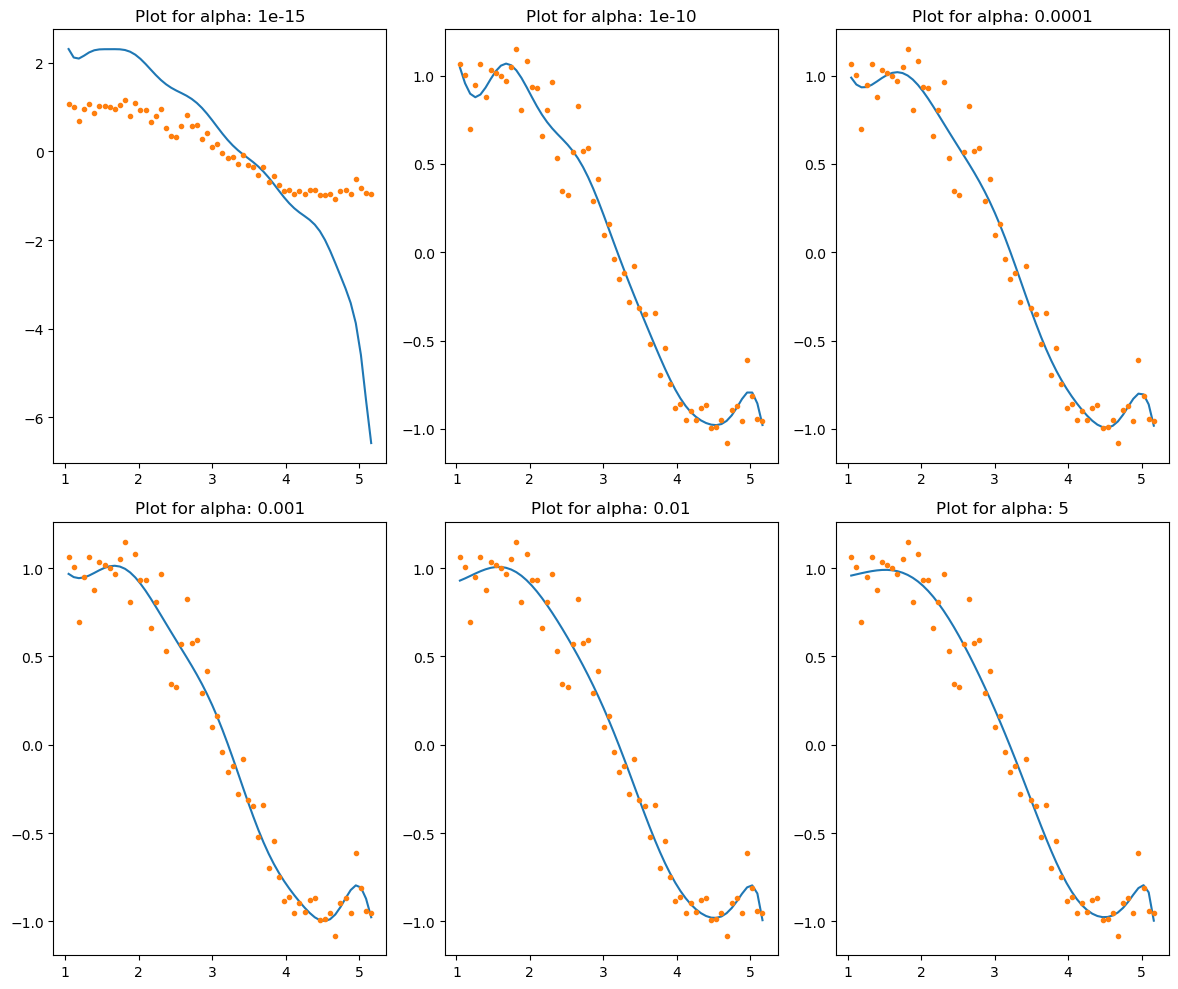

In [24]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

`as the value of alpha increases, the model complexity reduces.`

`A widely accepted technique is cross-validation, i.e., the value of alpha is iterated over a range of values, and the one giving a higher cross-validation score is chosen.`

In [25]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,1.3e+02,-2.8e+04,1.9e+05,-5.9e+05,1.1e+06,-1.4e+06,1.3e+06,-8.4e+05,4.2e+05,-1.6e+05,4.6e+04,-1e+04,1.6e+03,-1.9e+02,15,-0.71,0.016
alpha_1e-10,0.85,75,-6.5e+02,2e+03,-2.8e+03,1.1e+03,2e+03,-3.8e+03,3.3e+03,-1.8e+03,6.9e+02,-1.9e+02,36,-4.8,0.43,-0.023,0.00055
alpha_1e-08,0.87,-5.8,65,-1.1e+02,-9.5,1.3e+02,-49,-1.2e+02,1.8e+02,-1.2e+02,49,-13,2.5,-0.32,0.026,-0.0013,2.6e-05
alpha_0.0001,0.9,5.6,-5.9,-2.4,3,3,-1.7,-2.1,1.6,0.051,-0.41,0.17,-0.029,0.00066,0.00051,-7.2e-05,3.2e-06
alpha_0.001,0.91,2.5,-1.4,-1.1,0.095,0.93,0.58,-0.45,-0.61,0.32,0.31,-0.36,0.16,-0.038,0.0053,-0.00041,1.4e-05
alpha_0.01,0.93,1.1,-0.23,-0.15,0.083,0.23,0.098,-0.16,-0.13,0.16,-0.023,-0.03,0.019,-0.0049,0.00071,-5.4e-05,1.7e-06
alpha_1,0.94,0.87,0.0073,0.018,0.027,0.027,0.012,-0.011,-0.021,-0.0022,0.018,-0.0094,0.0015,0.0002,-0.00011,1.4e-05,-6.7e-07
alpha_5,0.95,0.92,0.0037,0.0086,0.013,0.014,0.0094,-0.00073,-0.0094,-0.0067,0.0053,0.0035,-0.0041,0.0015,-0.00029,2.9e-05,-1.1e-06
alpha_10,0.95,0.93,0.0025,0.0058,0.009,0.01,0.0081,0.0015,-0.0059,-0.0072,0.0012,0.0071,-0.0055,0.0019,-0.00034,3.2e-05,-1.2e-06
alpha_20,0.95,0.95,0.0017,0.004,0.0064,0.0076,0.0062,0.0016,-0.0043,-0.006,0.00048,0.0061,-0.0046,0.0015,-0.00027,2.6e-05,-9.9e-07


This straight away gives us the following inferences:

The RSS increases with an increase in alpha.
- An alpha value as small as 1e-15 gives us a significant reduction in the magnitude of coefficients. 
- How? Compare the coefficients in the first row of this table to the last row of the simple linear regression table.
- High alpha values can lead to significant underfitting. Note the rapid increase in RSS for values of alpha greater than 1
- Though the coefficients are really small, they are NOT zero.

The first 3 are very intuitive. But #4 is also a crucial observation. Let’s reconfirm the same by determining the number of zeros in each row of the coefficients data set:

In [26]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

This confirms that all 15 coefficients are greater than zero in magnitude (can be +ve or -ve). Remember this observation and have a look again until it’s clear. This will play an important role later while comparing ridge with lasso regression.

## How Does Lasso Regression Work?

LASSO stands for `Least Absolute Shrinkage and Selection Operator.` I know it doesn’t give much of an idea, but there are 2 keywords here – `‘absolute‘ and ‘selection. ‘`

Lasso regression performs L1 regularization, i.e., it adds a factor of the sum of the absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Here, α (alpha) works similar to that of the ridge and provides a trade-off between balancing RSS and the magnitude of coefficients. Like that of the ridge, α can take various values. Let’s iterate it here briefly:

- `α = 0: Same coefficients as simple linear regression`
- `α = ∞: All coefficients zero (same logic as before)`
- `0 < α < ∞: coefficients between 0 and that of simple linear regression`

In [37]:
# Define a generic function to display the results from the models
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    max_iter = 100000
    lassoreg = Lasso(alpha=alpha, max_iter=max_iter, random_state=100)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

`Notice the additional parameters defined in the Lasso function – ‘max_iter. ‘ This is the maximum number of iterations for which we want the model to run if it doesn’t converge before. `

Let’s check the output for 10 different values of alpha using the following code:

/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.784e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(
/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.784e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(
/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

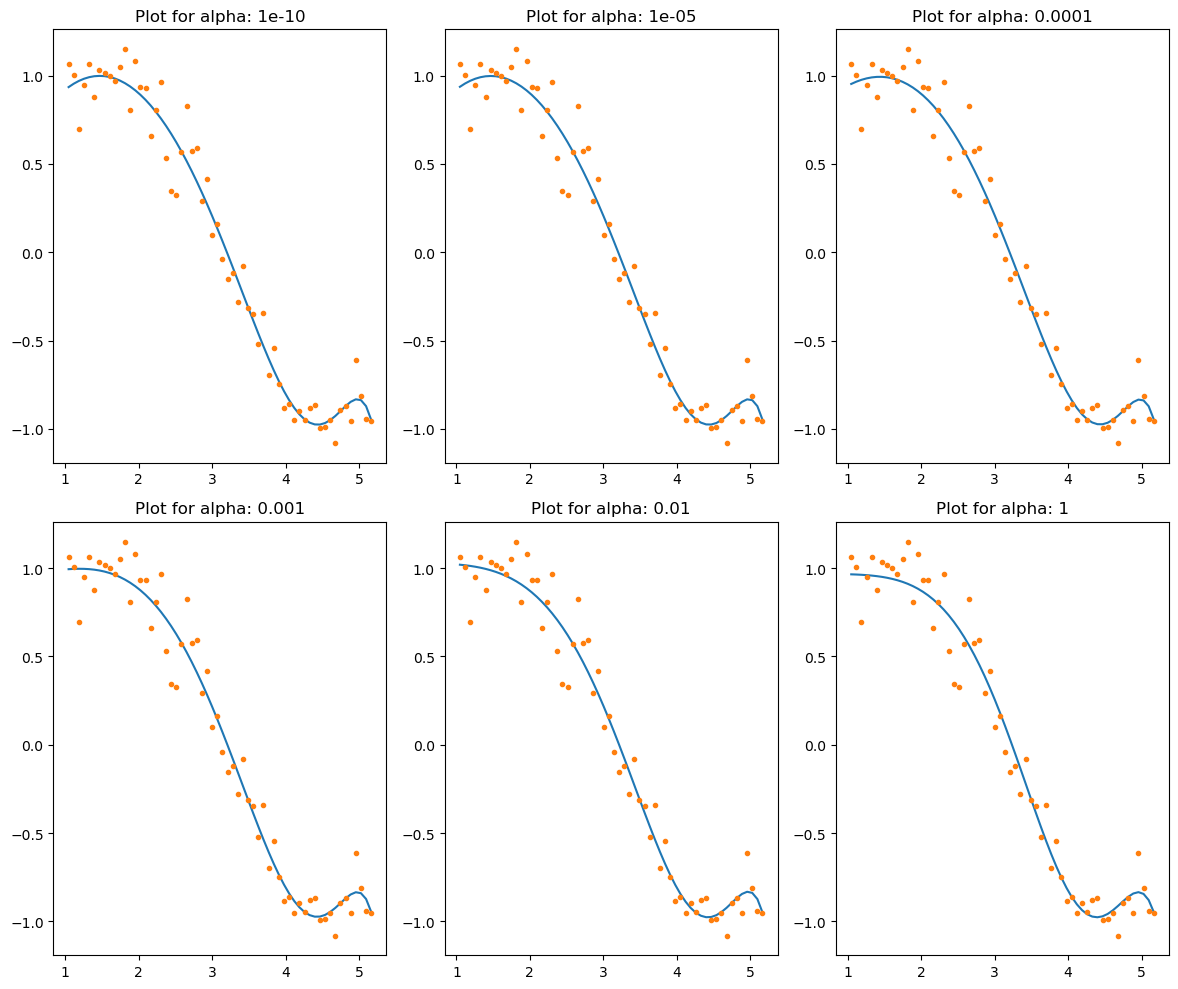

In [38]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [39]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_1e-05     0
alpha_0.0001    0
alpha_0.001     1
alpha_0.01      3
alpha_1         5
alpha_5         5
alpha_10        7
dtype: int64